# <span style= "color:cyan"> BUILDING A RECOMMENDATION SYSTEM </SPAN>

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### <span style= "color:orange"> Loading the dataset </SPAN>

In [66]:
# loading the datasets

users = pd.read_csv('BX-Users.csv', sep=';',encoding='latin-1' )


rating = pd.read_csv('BX-Book-Ratings.csv', sep=';',encoding='latin-1' )


In [67]:


# Define the CSV file path

file_path = 'BX-Books.csv'

# Define an empty list to store the valid rows
rows = []

# Open the file and read line by line
with open(file_path, 'r', encoding='latin-1') as file:
    for line in file:
        try:
            row = line.strip().split(';')
            rows.append(row)
        except Exception as e:
            print(f"Error occurred while parsing a line: {line.strip()}")

# Create a DataFrame from the valid rows
books = pd.DataFrame(rows)


we have three datasets:
* `books`
* `users`
* `rating`

Let us explore them by viewing first five columns of each

In [68]:
# first five rows

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [69]:
# first five rows of ratings

rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [70]:
# first five rows of books

books.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"""ISBN""","""Book-Title""","""Book-Author""","""Year-Of-Publication""","""Publisher""","""Image-URL-S""","""Image-URL-M""","""Image-URL-L""",None,None,None,None,None,None
1,"""0195153448""","""Classical Mythology""","""Mark P. O. Morford""","""2002""","""Oxford University Press""","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448....","""http://images.amazon.com/images/P/0195153448....",None,None,None,None,None,None
2,"""0002005018""","""Clara Callan""","""Richard Bruce Wright""","""2001""","""HarperFlamingo Canada""","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018....","""http://images.amazon.com/images/P/0002005018....",None,None,None,None,None,None
3,"""0060973129""","""Decision in Normandy""","""Carlo D'Este""","""1991""","""HarperPerennial""","""http://images.amazon.com/images/P/0060973129....","""http://images.amazon.com/images/P/0060973129....","""http://images.amazon.com/images/P/0060973129....",None,None,None,None,None,None
4,"""0374157065""","""Flu: The Story of the Great Influenza Pandemi...","""Gina Bari Kolata""","""1999""","""Farrar Straus Giroux""","""http://images.amazon.com/images/P/0374157065....","""http://images.amazon.com/images/P/0374157065....","""http://images.amazon.com/images/P/0374157065....",None,None,None,None,None,None


Already there is a problem with the book dataset:
* all values have quotation marks that need to be stripped
* the first row is our actual header it needs to be reset

In [ ]:
# stripping the quotation marks

books = books.apply(lambda x : x.str.replace('"', ""))

# viewing the changes

books.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,None,None,None,None,None,None
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,None,None,None,None,None,None
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,None,None,None,None,None,None
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,None,None,None,None,None,None
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,None,None,None,None,None,None


#### <span style= "color:orange"> Preliminary Data understanding </SPAN>

In [72]:
# setting the first row as our headers

# selecting the columns

books.columns = books.iloc[0]

# setting the column names

books = books[1:]

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,None,None,None,None,None,None
1,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,None,None,None,None,None,None
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,None,None,None,None,None,None
3,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,None,None,None,None,None,None
4,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,None,None,None,None,None,None
5,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp,Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,None,None,None,None,None


In [91]:
# checking for basic statistics of our data sets

def basic_stats(dataset, dataset_name):
    print('dataset: ',dataset_name )
    print('\n')
    dataset.info()
    print('-------------------')
    print('\n')
    print(dataset.describe())
    print('-------------------')
    print('\n')
    print('shape: ',dataset.shape)
    


In [93]:
# ratings dataset info

basic_stats(rating, 'rating')

dataset:  rating


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB
-------------------


            User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01
-------------------


shape:  (1149780, 3)


In [94]:
basic_stats(books, 'books')

dataset:  books


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 1 to 271379
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271379 non-null  object
 3   Year-Of-Publication  271379 non-null  object
 4   Publisher            271379 non-null  object
 5   Image-URL-S          271379 non-null  object
 6   Image-URL-M          271379 non-null  object
 7   Image-URL-L          271379 non-null  object
 8   None                 21367 non-null   object
 9   None                 1033 non-null    object
 10  None                 75 non-null      object
 11  None                 13 non-null      object
 12  None                 3 non-null       object
 13  None                 1 non-null       object
dtypes: object(14)
memory usage: 29.0+ MB
-------------------


0      

* There are columns labelled None, with numerous null values, these will be analyzed during the data cleaning stage

In [95]:
basic_stats(users, 'users')

dataset:  users


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB
-------------------


            User-ID            Age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000
-------------------


shape:  (278858, 3)


In [103]:
## finding the datatypes of our dataset

users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

* the datatypes are correct as they are no need for ammendment

In [105]:
## finding the datatypes of our dataset

rating.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

* the datatypes are correct as they are no need for ammendment

In [106]:
books.dtypes

0
ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
None                   object
None                   object
None                   object
None                   object
None                   object
None                   object
dtype: object

* the datatypes are correct as they are no need for ammendment

#### <span style= "color:orange"> Data Cleaning </SPAN>

#### Checking for missing and duplicate values

In [118]:
# check for duplicates

datasets = [users, rating, books]

for dataset in datasets:
    print('duplicates: ', dataset.duplicated().sum())

duplicates:  0
duplicates:  0
duplicates:  0


In [125]:
# checking for null values in percentage in relation to length of the dataset

def missing_values(dataset):
    return dataset.isna().sum()/len(dataset)

In [126]:
# null values users dataset

missing_values(users)

User-ID     0.000000
Location    0.000000
Age         0.397199
dtype: float64

* the age column has 40 % of missing values.
* this can be dropped as it will have no impact in our recommendation system

In [127]:
# dropping the Age column

users = users.drop('Age', axis= 1)

In [141]:
# checking for missing values in ratings

missing_values(rating)

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

* this has no missing value

In [143]:
# checking for missing values in books

missing_values(books)

0
ISBN                   0.000000
Book-Title             0.000000
Book-Author            0.000000
Year-Of-Publication    0.000000
Publisher              0.000000
Image-URL-S            0.000000
Image-URL-M            0.000000
Image-URL-L            0.000000
None                   0.921265
None                   0.996194
None                   0.999724
None                   0.999952
None                   0.999989
None                   0.999996
dtype: float64

* The none columns will have to be dropped as they have over 99 percent rate of missing values
* This was mainly an issue in data collection as whatever information was to be captured here was not fully represented

In [152]:
# dropping the columns with missing values

books = books.loc[:, 'ISBN' : 'Image-URL-L']

In [154]:
# confirming null values

missing_values(books)


0
ISBN                   0.0
Book-Title             0.0
Book-Author            0.0
Year-Of-Publication    0.0
Publisher              0.0
Image-URL-S            0.0
Image-URL-M            0.0
Image-URL-L            0.0
dtype: float64

#### <span style= "color:orange"> Feature Selection and EDA </SPAN>

In [157]:
# merging our user and rating datasets

df_rating = users.merge(rating, on= 'User-ID')

# viewing first five columns

df_rating.head()

,User-ID,Location,ISBN,Book-Rating
0,2,"stockton, california, usa",0195153448,0
1,7,"washington, dc, usa",034542252,0
2,8,"timmins, ontario, canada",0002005018,5
3,8,"timmins, ontario, canada",0060973129,0
4,8,"timmins, ontario, canada",0374157065,0


In [158]:
# checking for shape

df_rating.shape


(1149780, 4)

In [159]:
# checking for duplicates

df_rating.duplicated().sum()

0

In [160]:
# checking for missing values 

missing_values(df_rating)

User-ID        0.0
Location       0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

* with our user and ratings combined, this needs to be merged with our book dataset

In [162]:
# merging df_rating with book dataset

df_books = books.merge(df_rating, on = 'ISBN')

In [168]:
# checking for shape

df_books.shape

(1031175, 11)

In [163]:
# viewing the first five columns

df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Location,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2,"stockton, california, usa",0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,"timmins, ontario, canada",5
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400,"ottawa, ontario, canada",0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676,"n/a, n/a, n/a",8
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385,"sudbury, ontario, canada",0


In [164]:
# checking for duplicates

df_books.duplicated().sum()

0

In [165]:
# checking for missing values

missing_values(df_books)

ISBN                   0.0
Book-Title             0.0
Book-Author            0.0
Year-Of-Publication    0.0
Publisher              0.0
Image-URL-S            0.0
Image-URL-M            0.0
Image-URL-L            0.0
User-ID                0.0
Location               0.0
Book-Rating            0.0
dtype: float64

* lets visualize the dataset

In [173]:
# a dataframe to help establish most popular books by number of times read

popularity_df = pd.DataFrame(df_books['Book-Title'].value_counts())

popularity_df

,count
Book-Title,
Wild Animus,2502
The Lovely Bones: A Novel,1295
The Da Vinci Code,898
A Painted House,838
The Nanny Diaries: A Novel,828
...,...
Field Guide to the Birds,1
Cooking Class Mexican Cookbook,1
Quickhand (Wiley Self-Teaching Guides),1


C:\Users\Hp\AppData\Local\Temp\ipykernel_20116\4243564481.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


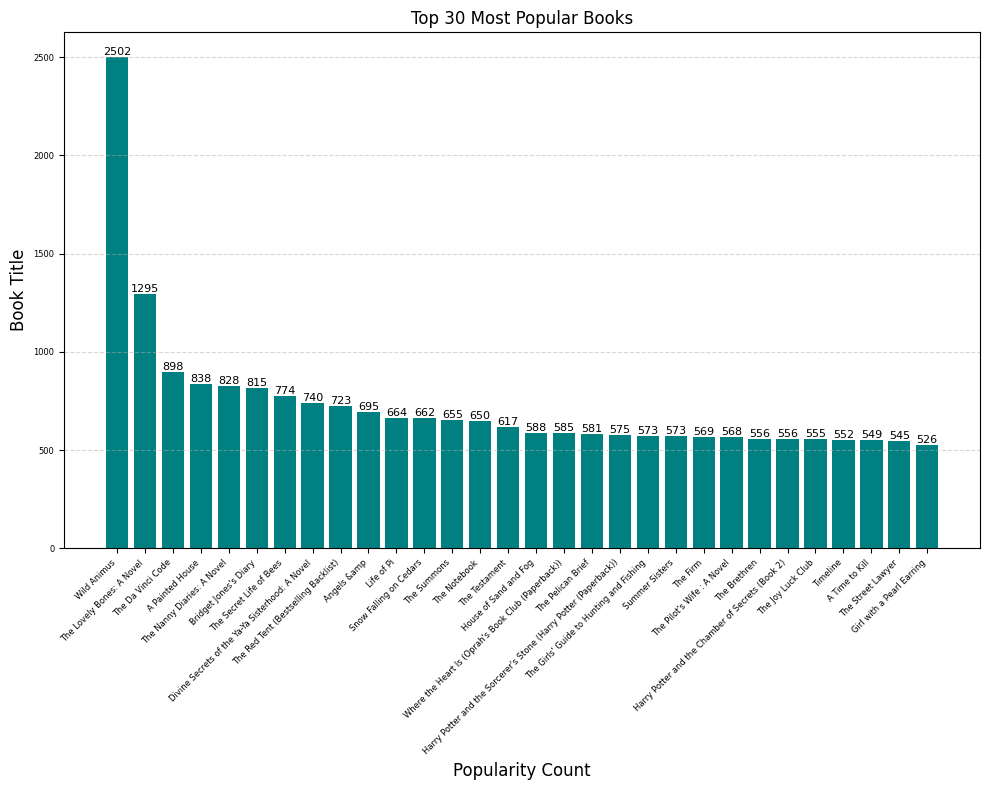

In [198]:


# Get the top 30 books based on popularity

top_30_books = popularity_df.head(30)

# Set up the figure and axes

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the popularity scores

bars = ax.bar(top_30_books.index, top_30_books['count'], color='teal')

# Customize the plot

ax.set_xlabel('Popularity Count', fontsize=12)
ax.set_ylabel('Book Title', fontsize=12)
ax.set_title('Top 30 Most Popular Books', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add count labels on the bars

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, height,
            ha='center', va='bottom', fontsize=8)
    
# Add grid lines
    
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust the layout

plt.tight_layout()

# Display the plot
plt.show()
